In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from myutils import remove_nonnumeric

In [131]:
url = "data/cars-dataset1.csv"
df = pd.read_csv(url)

In [132]:
df.head()

,Car Names,Mileages,Ratings,Reviews,used/certified,Price
0,2019 Honda Accord Sport,Mileage,3.7,(3 reviews),Used,"$27,995.00"
1,2015 Chevrolet Corvette Stingray Z51,"29,192 mi.",3.7,(3 reviews),Used,"$52,000.00"
2,2020 Jeep Grand Cherokee Overland,"53,561 mi.",4.8,"(1,147 reviews)",Used,"$41,998.00"
3,2019 Audi A7 3.0T Prestige,"46,664 mi.",4.9,"(1,831 reviews)",Used,"$62,750.00"
4,2017 Ford Mustang GT Premium,"21,726 mi.",4.0,(409 reviews),Used,"$29,995.00"


In [133]:
# initialize features for filtered dataset
new_df = {}
names = ['name', 'year', 'mileage', 'used/cert', 'rating', 'reviews', 'price']

for name in names:
    new_df[name] = []
    
# filter data and put into new data file (new_df)
for sample in df.values:
    
    # Ignore rows that have Mileage = 'Mileage' or Price = 'Not Priced'
    if sample[1] == 'Mileage' or sample[5] == 'Not Priced':
        continue
    
    new_df['name'].append(sample[0][5:].lower())
    new_df['year'].append(int(sample[0][0:4]))
    new_df['mileage'].append(int(remove_nonnumeric(sample[1])))
    new_df['rating'].append(float(sample[2]))
    new_df['reviews'].append(int(remove_nonnumeric(sample[3])))
    
    # used -> 0 ; certified -> 1
    if sample[4] == 'Used':
        new_df['used/cert'].append(0)
    else:
        new_df['used/cert'].append(1)

    new_df['price'].append(int(remove_nonnumeric(sample[5][:-3])))

In [134]:
# A look at the new dataset
df = pd.DataFrame(new_df)
df.to_csv()
df

,name,year,mileage,used/cert,rating,reviews,price
0,chevrolet corvette stingray z51,2015,29192,0,3.7,3,52000
1,jeep grand cherokee overland,2020,53561,0,4.8,1147,41998
2,audi a7 3.0t prestige,2019,46664,0,4.9,1831,62750
3,ford mustang gt premium,2017,21726,0,4.0,409,29995
4,jeep grand cherokee limited,2016,66514,0,4.6,1348,26499
...,...,...,...,...,...,...,...
9123,lexus is 300 base,2019,61106,0,4.7,4658,36500
9124,kia sorento l,2019,11132,0,4.8,505,23450
9125,gmc acadia denali,2017,55074,0,3.4,127,29381
9126,honda pilot elite,2019,57150,1,4.9,8222,38488


(0.0, 300000.0)

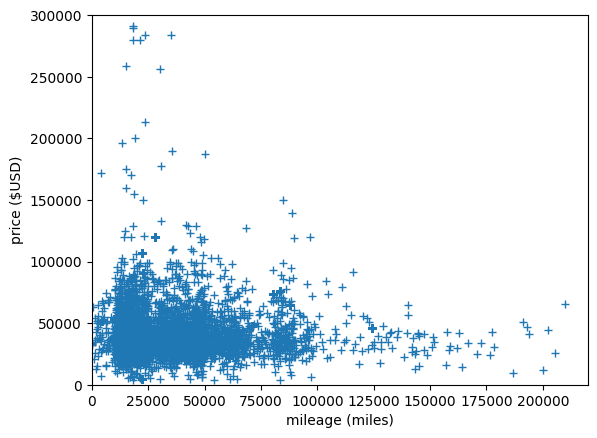

In [146]:
# plot all the points
X = df['mileage'].tolist()
y = df['price'].tolist()
plt.plot(X, y, marker='+', linestyle='')
plt.xlabel('mileage (miles)')
plt.ylabel('price ($USD)')
plt.xlim(0, 220_000)
plt.ylim(0, 300_000)
# df.shape
# df.drop_duplicates()   duplicates should be removed later
# df.shape

In [147]:
# user input
make_in = "Honda"
model_in = "Pilot"
trim_in = "EX-L"
year_in = 2021
usedcert_in = 0

In [166]:
# Get sub-dataset to run regression on
user_input = " ".join([make_in, model_in, trim_in]).lower()
count = 0

X_train = np.empty((0,5)) # empty 2D array with 0 rows, 5 columns
y_train = np.array([])    # empty 1D array with 0 elements

for sample in df.values:
    if user_input in sample[0]:
        X_train = np.vstack((X_train, sample[1:6]))
        y_train = np.append(y_train, sample[6])

# is the exact input name in the database at least 3 times?
if y_train.shape[0] >= 3:
    

44